In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

2023-02-05 10:59:04.483872: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('./digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
def pixelize(row):
    return np.reshape(df.iloc[row:row+1,1:].to_numpy(), (28,28))

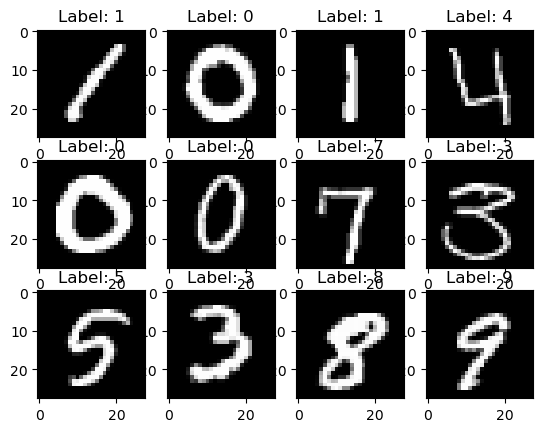

In [4]:
fig = plt.Figure(figsize=(12,16))

def show_image(row):
    pixels = pixelize(row)
    plt.subplot(3,4,row+1)
    img = plt.imshow(pixels, cmap='gray')
    ax = plt.gca()
    ax.set_title('Label: ' + str(df.iloc[row].label))
    return pixels, img

for i in range(12):
    show_image(i)
    
plt.show()



<AxesSubplot:>

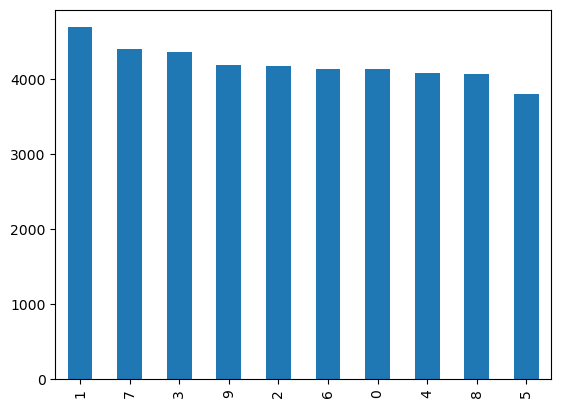

In [5]:
df.label.value_counts().plot.bar()

In [6]:
np.mean(df.drop(columns=['label']).loc[df.label == 1].to_numpy())

19.373043709371025

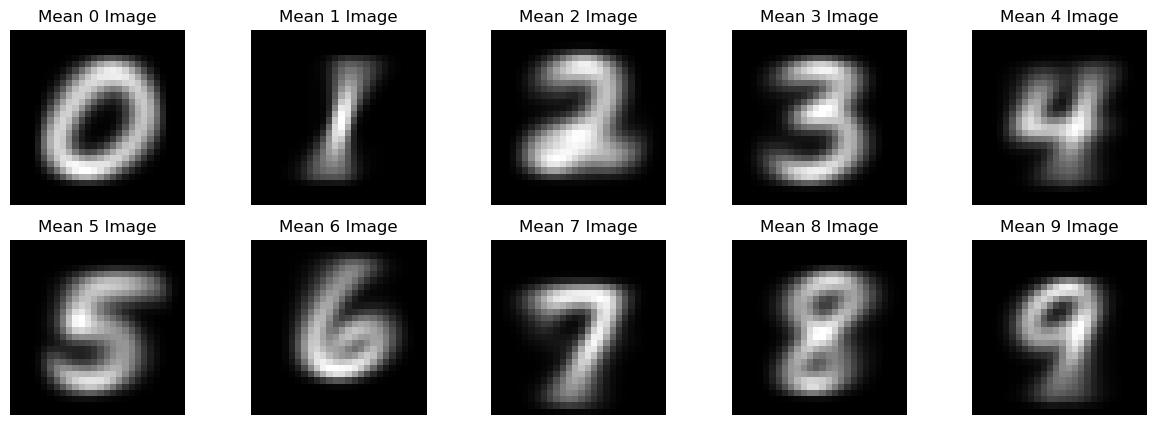

In [7]:
def mean_img(number, ax):
    mean = df.drop(columns=['label']).loc[df.label == number].mean().to_numpy()
    pixels =  np.reshape(mean, (28,28))
    ax.imshow(pixels, cmap='gray')
    ax.set_title(f'Mean {number} Image')
    ax.axis('off')
    return mean
    

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,5))

for i in range(10):
    mean_img(i, ax[i//5][i%5])



In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['label']),df.label, test_size=.15, random_state=42)

<AxesSubplot:>

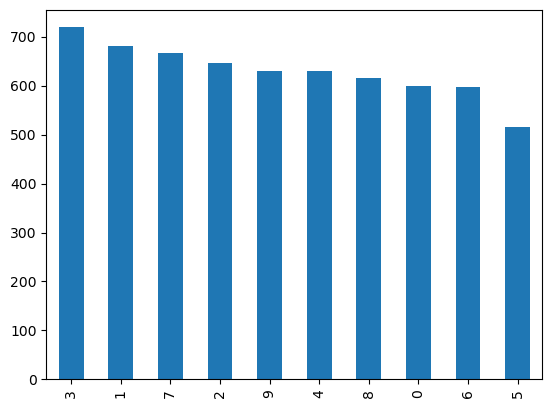

In [14]:
y_test.value_counts().plot.bar()

In [15]:
svc = SVC(class_weight='balanced')

params = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'C':[.5,1,5]
}

grid = GridSearchCV(
    estimator=svc,
    param_grid=params,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='f1_micro'
)


grid.fit(X_train,y_train)

grid.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


KeyboardInterrupt: 

In [ ]:
grid.score(X_train,y_train)